In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = "./Sales_Data/"

file_list = os.listdir(file_path)

file_list = [file_path + f for f in file_list]

file_list

['./Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_February_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_September_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_June_2019.csv']

In [3]:
# very important to add ignore index or it will read the title for column titles in each file
base_df = pd.concat([ pd.read_csv(file) for file in file_list], ignore_index=True)

base_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
base_df.to_csv('all_sales_2019.csv', index=False)

In [5]:
data = pd.read_csv('all_sales_2019.csv').set_index('Order ID')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 295665 to 222909
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


In [7]:
# remove empty lines
data = data.dropna(axis=0, how='all')

In [8]:
# remove column titles
data = data[data['Order Date'].str[:2] != 'Or']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 295665 to 222909
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           185950 non-null  object
 1   Quantity Ordered  185950 non-null  object
 2   Price Each        185950 non-null  object
 3   Order Date        185950 non-null  object
 4   Purchase Address  185950 non-null  object
dtypes: object(5)
memory usage: 8.5+ MB


## 1. What was the best month for sales, how much money was earned that month?

In [10]:
# convert date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], infer_datetime_format=True)

data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [11]:
# add month column
def add_month(row):
    month = row['Order Date'].month
    return month


# add hour column - i'd like to check when people are more likely to buy stuff
def add_hour(row):
    hour = row['Order Date'].hour
    return hour

data['Month'] = data.apply(add_month, axis=1)
# data['Hour'] = data.apply(add_hour, axis=1)

data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


In [12]:
# add order total column
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

def add_order_total(row):
    quantity = row['Quantity Ordered']
    price = row['Price Each']
    total = price * quantity
    return total

# data['Order Total'] = data.apply(add_order_total,axis=1)

# Easier solution:
data['Order Total'] = data['Quantity Ordered'] * data['Price Each']

data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Total
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [13]:
# print total monthly sales

monthly_sales = data.groupby('Month').sum(numeric_only=True)

monthly_sales

,Quantity Ordered,Price Each,Order Total
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 1.0, 'Total Monthly Sales')

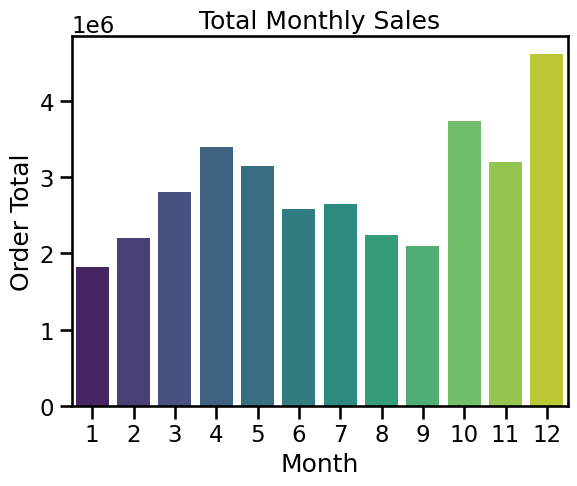

In [31]:
sns.set_context("talk")

ax = sns.barplot(monthly_sales, y="Order Total", x=monthly_sales.index, palette='viridis')

ax.set_title('Total Monthly Sales')

In [17]:
print("The best month for sales was " + pd.to_datetime(monthly_sales['Order Total'].idxmax(), format="%m").strftime('%B') + ", with " + f'{monthly_sales["Order Total"].max():,.2f}' + " $ worth of sales.")

The best month for sales was December, with 4,613,443.34 $ worth of sales.


In [ ]:
# not really relevant 
# hourly_sales = data.groupby('Hour')['Order Total'].sum()

# print("The most popular hour for sales was " + str(hourly_sales.idxmax()) + ":00.")

The most popular hour for sales was 19:00.


## What City had the highest number of sales ?